# REALIS `sklearn` Regression

*By Ian Chong*

This Jupyter notebook aims to take an in-depth look at the Singapore residential property market.

The dataset consists of residential property transactions from 2015 to May 2020, downloaded from the URA REALIS database.

The core libraries used are `pandas`, `seaborn`, `matplotlib` and `scikit-learn`.

Over the course of this exercise, we will:

1. Load the data from the component `.csv` files
2. Explore the dataset by visualizing relationships and performing statistical analysis
3. Perform feature engineering to extract more insights from existing data
4. Scale the numerical data to control for skewness, as well as encode the categorical data
5. Fit regression models to the processed data
6. Optimize chosen models using `RandomizedSearchCV`
7. Output models into `.pkl` files for future retrieval and deployment

In [1]:
# If csv's have not been combined, run these two cells
import os
import glob
import pandas as pd
extension = 'csv'
all_filenames = [i for i in glob.glob('data/*.{}'.format(extension))]
all_filenames

['data\\2015Q1_1.csv',
 'data\\2015Q1_1001.csv',
 'data\\2015Q1_2001.csv',
 'data\\2015Q2_1.csv',
 'data\\2015Q2_1001.csv',
 'data\\2015Q2_2001.csv',
 'data\\2015Q2_3001.csv',
 'data\\2015Q2_4001.csv',
 'data\\2015Q3_1.csv',
 'data\\2015Q3_1001.csv',
 'data\\2015Q3_2001.csv',
 'data\\2015Q3_3001.csv',
 'data\\2015Q3_4001.csv',
 'data\\2015Q3_5001.csv',
 'data\\2015Q4_1.csv',
 'data\\2015Q4_1001.csv',
 'data\\2015Q4_2001.csv',
 'data\\2015Q4_3001.csv',
 'data\\2015Q4_4001.csv',
 'data\\2015Q4_5001.csv',
 'data\\2016Q1_1.csv',
 'data\\2016Q1_1001.csv',
 'data\\2016Q1_2001.csv',
 'data\\2016Q1_3001.csv',
 'data\\2016Q2_1.csv',
 'data\\2016Q2_1001.csv',
 'data\\2016Q2_2001.csv',
 'data\\2016Q2_3001.csv',
 'data\\2016Q2_4001.csv',
 'data\\2016Q2_5001.csv',
 'data\\2016Q3_1.csv',
 'data\\2016Q3_1001.csv',
 'data\\2016Q3_2001.csv',
 'data\\2016Q3_3001.csv',
 'data\\2016Q3_4001.csv',
 'data\\2016Q3_5001.csv',
 'data\\2016Q4_1.csv',
 'data\\2016Q4_1001.csv',
 'data\\2016Q4_2001.csv',
 'data\\20

In [2]:
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])
combined_csv.to_csv("combined_data.csv", index=False, encoding='utf-8-sig')

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoLars
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn import svm
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RandomizedSearchCV

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pprint import pprint

import warnings
warnings.filterwarnings('ignore')

c:\users\ian chong\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


----

# 1 - Load data

There are `231,048` observations in the dataset, with no missing values

In [4]:
data = pd.read_csv('combined_data.csv', parse_dates=True)
data.describe()

,No. of Units,Area (sqm),Transacted Price ($),Unit Price ($ psm),Unit Price ($ psf),Postal District,Postal Sector,Postal Code
count,115524.000000,115524.000000,1.155240e+05,115524.000000,115524.000000,115524.000000,115524.000000,115524.000000
mean,1.063476,125.642187,1.793984e+06,14381.656193,1336.088666,15.985414,45.923124,467075.160980
std,3.791975,593.299530,9.954862e+06,5448.406820,506.167317,7.154524,21.273676,212370.120063
min,1.000000,24.000000,4.000000e+04,355.000000,33.000000,1.000000,1.000000,18965.000000
25%,1.000000,68.000000,8.900000e+05,10317.000000,958.000000,10.000000,27.000000,277116.000000
50%,1.000000,97.000000,1.198800e+06,13725.000000,1275.000000,17.000000,50.000000,509068.000000
75%,1.000000,124.000000,1.700000e+06,17152.000000,1593.000000,21.000000,59.000000,599643.500000
max,560.000000,87986.000000,9.800000e+08,60634.000000,5633.000000,28.000000,82.000000,829755.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115524 entries, 0 to 115523
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Project Name                 115524 non-null  object
 1   Address                      115524 non-null  object
 2   No. of Units                 115524 non-null  int64 
 3   Area (sqm)                   115524 non-null  int64 
 4   Type of Area                 115524 non-null  object
 5   Transacted Price ($)         115524 non-null  int64 
 6   Nett Price($)                115524 non-null  object
 7   Unit Price ($ psm)           115524 non-null  int64 
 8   Unit Price ($ psf)           115524 non-null  int64 
 9   Sale Date                    115524 non-null  object
 10  Property Type                115524 non-null  object
 11  Tenure                       115524 non-null  object
 12  Completion Date              115524 non-null  object
 13  Type of Sale  

In [6]:
data.head(10)

,Project Name,Address,No. of Units,Area (sqm),Type of Area,Transacted Price ($),Nett Price($),Unit Price ($ psm),Unit Price ($ psf),Sale Date,Property Type,Tenure,Completion Date,Type of Sale,Purchaser Address Indicator,Postal District,Postal Sector,Postal Code,Planning Region,Planning Area
0,JEWEL @ BUANGKOK,81 Compassvale Bow #14-01,1,81,Strata,1150500,-,14204,1320,31-MAR-2015,Condominium,99 Yrs From 12/09/2012,Uncompleted,New Sale,Private,19,54,544823,North East Region,Sengkang
1,KINGSFORD WATERBAY,66 Upper Serangoon View #11-15,1,96,Strata,1173000,-,12219,1135,31-MAR-2015,Apartment,99 Yrs From 03/03/2014,Uncompleted,New Sale,HDB,19,53,533885,North East Region,Hougang
2,KINGSFORD WATERBAY,68 Upper Serangoon View #09-21,1,63,Strata,765000,-,12143,1128,31-MAR-2015,Apartment,99 Yrs From 03/03/2014,Uncompleted,New Sale,HDB,19,53,533884,North East Region,Hougang
3,SIMS URBAN OASIS,2 Sims Drive #10-10,1,43,Strata,663380,-,15427,1433,31-MAR-2015,Condominium,99 Yrs From 29/07/2014,Uncompleted,New Sale,HDB,14,38,387386,Central Region,Geylang
4,SEVENTY SAINT PATRICK'S,86 St. Patrick'S Road #05-47,1,81,Strata,1529000,-,18877,1754,31-MAR-2015,Condominium,Freehold,Uncompleted,New Sale,HDB,15,42,424184,East Region,Bedok
5,KINGSFORD WATERBAY,80 Upper Serangoon View #07-75,1,63,Strata,780000,-,12381,1150,31-MAR-2015,Apartment,99 Yrs From 03/03/2014,Uncompleted,New Sale,HDB,19,53,533878,North East Region,Hougang
6,KINGSFORD WATERBAY,80 Upper Serangoon View #08-73,1,111,Strata,1378000,-,12414,1153,31-MAR-2015,Apartment,99 Yrs From 03/03/2014,Uncompleted,New Sale,Private,19,53,533878,North East Region,Hougang
7,KINGSFORD WATERBAY,78 Upper Serangoon View #03-68,1,79,Strata,938000,-,11873,1103,31-MAR-2015,Apartment,99 Yrs From 03/03/2014,Uncompleted,New Sale,Private,19,53,533879,North East Region,Hougang
8,8 NAPIER,8 Napier Road #07-03,1,258,Strata,8575376,-,33238,3088,31-MAR-2015,Condominium,Freehold,2010,Resale,Private,10,25,258502,Central Region,Tanglin
9,CLEMENTIWOODS CONDOMINIUM,82 West Coast Road #05-27,1,106,Strata,1250000,-,11792,1096,31-MAR-2015,Condominium,99 Yrs From 07/02/2006,2010,Resale,Private,5,12,126817,West Region,Clementi


The `Sale Date` column is of `dtype=object`, which is not correct. There seems to have been trouble parsing the date. we use the `Series.to_datetime` method to fix this.

In [7]:
# parse date for sale date
data['Sale Date'] = pd.to_datetime(data['Sale Date'], format='%d-%b-%Y')

The field `Nett Price($)` is an object when it should be a numerical field. However, we already have `Transacted Price ($)` which we are trying to predict. It makes more sense to drop the field

In [8]:
data.drop('Nett Price($)', inplace=True, axis=1)

In [9]:
data.head(10)

,Project Name,Address,No. of Units,Area (sqm),Type of Area,Transacted Price ($),Unit Price ($ psm),Unit Price ($ psf),Sale Date,Property Type,Tenure,Completion Date,Type of Sale,Purchaser Address Indicator,Postal District,Postal Sector,Postal Code,Planning Region,Planning Area
0,JEWEL @ BUANGKOK,81 Compassvale Bow #14-01,1,81,Strata,1150500,14204,1320,2015-03-31,Condominium,99 Yrs From 12/09/2012,Uncompleted,New Sale,Private,19,54,544823,North East Region,Sengkang
1,KINGSFORD WATERBAY,66 Upper Serangoon View #11-15,1,96,Strata,1173000,12219,1135,2015-03-31,Apartment,99 Yrs From 03/03/2014,Uncompleted,New Sale,HDB,19,53,533885,North East Region,Hougang
2,KINGSFORD WATERBAY,68 Upper Serangoon View #09-21,1,63,Strata,765000,12143,1128,2015-03-31,Apartment,99 Yrs From 03/03/2014,Uncompleted,New Sale,HDB,19,53,533884,North East Region,Hougang
3,SIMS URBAN OASIS,2 Sims Drive #10-10,1,43,Strata,663380,15427,1433,2015-03-31,Condominium,99 Yrs From 29/07/2014,Uncompleted,New Sale,HDB,14,38,387386,Central Region,Geylang
4,SEVENTY SAINT PATRICK'S,86 St. Patrick'S Road #05-47,1,81,Strata,1529000,18877,1754,2015-03-31,Condominium,Freehold,Uncompleted,New Sale,HDB,15,42,424184,East Region,Bedok
5,KINGSFORD WATERBAY,80 Upper Serangoon View #07-75,1,63,Strata,780000,12381,1150,2015-03-31,Apartment,99 Yrs From 03/03/2014,Uncompleted,New Sale,HDB,19,53,533878,North East Region,Hougang
6,KINGSFORD WATERBAY,80 Upper Serangoon View #08-73,1,111,Strata,1378000,12414,1153,2015-03-31,Apartment,99 Yrs From 03/03/2014,Uncompleted,New Sale,Private,19,53,533878,North East Region,Hougang
7,KINGSFORD WATERBAY,78 Upper Serangoon View #03-68,1,79,Strata,938000,11873,1103,2015-03-31,Apartment,99 Yrs From 03/03/2014,Uncompleted,New Sale,Private,19,53,533879,North East Region,Hougang
8,8 NAPIER,8 Napier Road #07-03,1,258,Strata,8575376,33238,3088,2015-03-31,Condominium,Freehold,2010,Resale,Private,10,25,258502,Central Region,Tanglin
9,CLEMENTIWOODS CONDOMINIUM,82 West Coast Road #05-27,1,106,Strata,1250000,11792,1096,2015-03-31,Condominium,99 Yrs From 07/02/2006,2010,Resale,Private,5,12,126817,West Region,Clementi


The dataset is now properly loaded, and ready for further cleaning and manipulation

----

# 2 - Clean, Prepare & Manipulate Data

## 2.1 - Exploratory Data Analysis

In this section, we will take a closer look at the nature and the relationships between the data through a series of visualizations.

The following code returns a list of all columns that are not numerical.

In [10]:
category_cols = data.select_dtypes(include='object').columns.to_list()
category_cols

['Project Name',
 'Address',
 'Type of Area',
 'Property Type',
 'Tenure',
 'Completion Date',
 'Type of Sale',
 'Purchaser Address Indicator',
 'Planning Region',
 'Planning Area']

Here are the columns in the dataset with numeric data at this point in time.

In [11]:
numeric_cols = data.select_dtypes(include=[np.number]).columns.to_list()
numeric_cols

['No. of Units',
 'Area (sqm)',
 'Transacted Price ($)',
 'Unit Price ($ psm)',
 'Unit Price ($ psf)',
 'Postal District',
 'Postal Sector',
 'Postal Code']

To get a high level overview of the relation ships within the numeric data columns, we can use a correlation heatmap using `seaborn.heatmap`.

As expected, the highest correlations among numeric data are the transaction price and the size of the house.

Text(0.5, 1.0, 'REALIS Data - Correlation Heatmap')

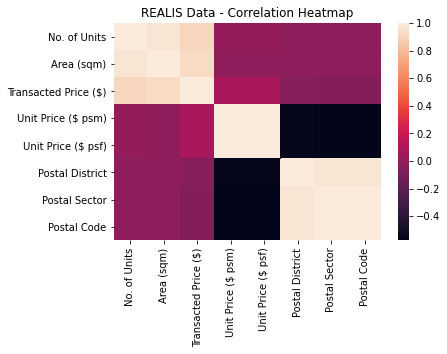

In [12]:
corr = data.corr()
sns.heatmap(corr)
plt.title('REALIS Data - Correlation Heatmap')

In [13]:
corr['Transacted Price ($)'].sort_values(ascending=False)

Transacted Price ($)    1.000000
Area (sqm)              0.930903
No. of Units            0.910742
Unit Price ($ psf)      0.081661
Unit Price ($ psm)      0.081661
Postal District        -0.044935
Postal Sector          -0.048991
Postal Code            -0.049004
Name: Transacted Price ($), dtype: float64

Next, let's visualize the distribution of transaction prices among the various `Planning Regions` and `Property Types`.

There is a very clear skewedness of transaction prices, especially in high rise houses in the Central Region.

We will need to scale the data during the preprocessing phase.

Text(0.5, 1.0, 'Box Plot of Transacted Price ($)')

<Figure size 720x432 with 0 Axes>

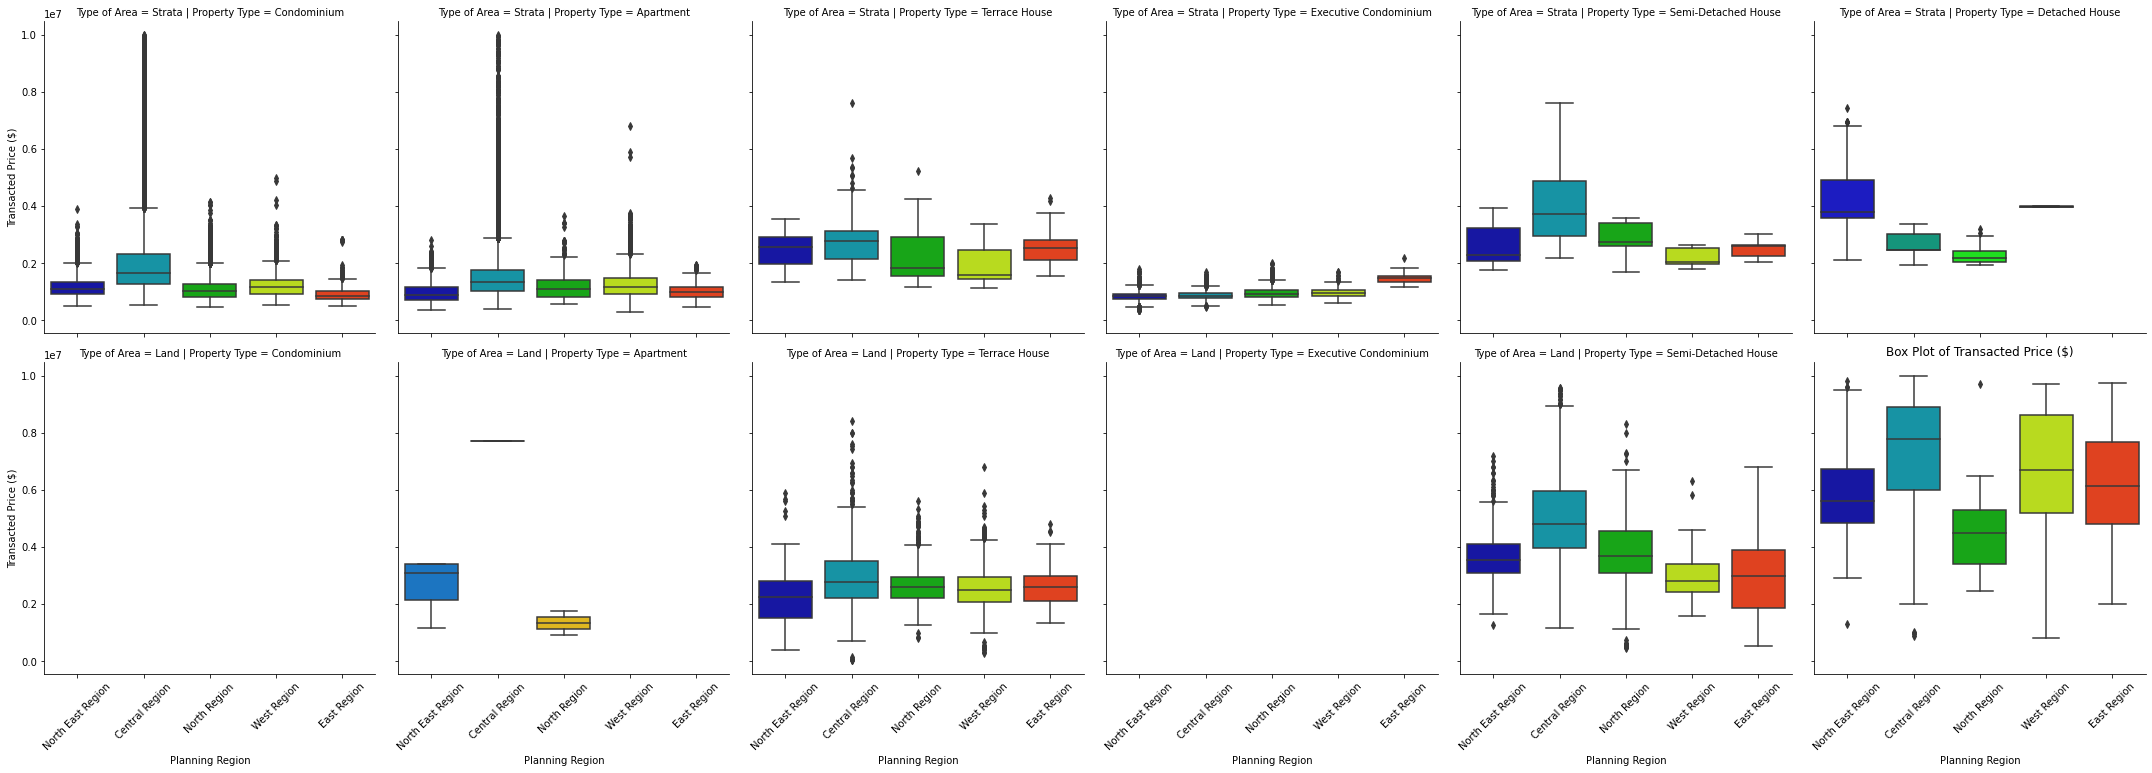

In [14]:
plt.figure(figsize=(10, 6))
g = sns.FacetGrid(data[data['Transacted Price ($)'] < 10000000],
                  col="Property Type", row="Type of Area", height=5, aspect=1)
g = g.map(sns.boxplot, 'Planning Region',
          'Transacted Price ($)', palette="nipy_spectral")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        
plt.title('Box Plot of Transacted Price ($)')

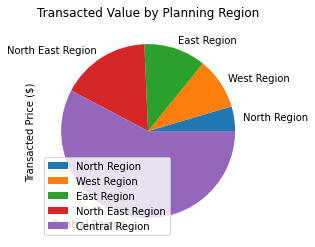

In [15]:
transacted_pie = data['Transacted Price ($)'].groupby(
    by=data["Planning Region"]).sum().sort_values()
transacted_pie.plot(kind='pie')
plt.title("Transacted Value by Planning Region")
plt.legend()

The histogram we try to plot is not useful. With the sheer range in transaction prices on the x axis, most of the transactions happen within a small bin. 

This is more easily seen by the steep profile of the cumulative frequency distribution (CDF) plot, which means most of the observations have already been accounted for at lower `Transacted Price ($)` in relation to the range

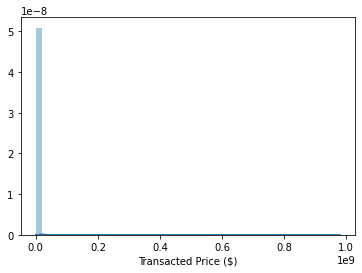

In [16]:
sns.distplot(data['Transacted Price ($)'])

Text(0.5, 1.0, 'CDF Plot - Transacted Price ($) < SGD 10.0m')

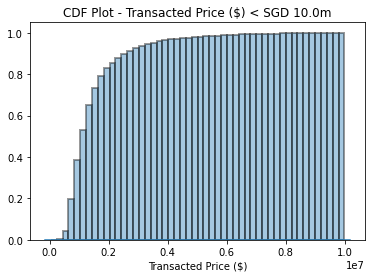

In [17]:
mask_amount = 10000000
mask = data['Transacted Price ($)'] < mask_amount
sns.distplot(data['Transacted Price ($)'][mask], hist_kws=dict(
    edgecolor="k", linewidth=2, cumulative=True))
plt.title(
    'CDF Plot - Transacted Price ($) < SGD {:.1f}m'.format(mask_amount/1000000))

<Figure size 720x432 with 0 Axes>

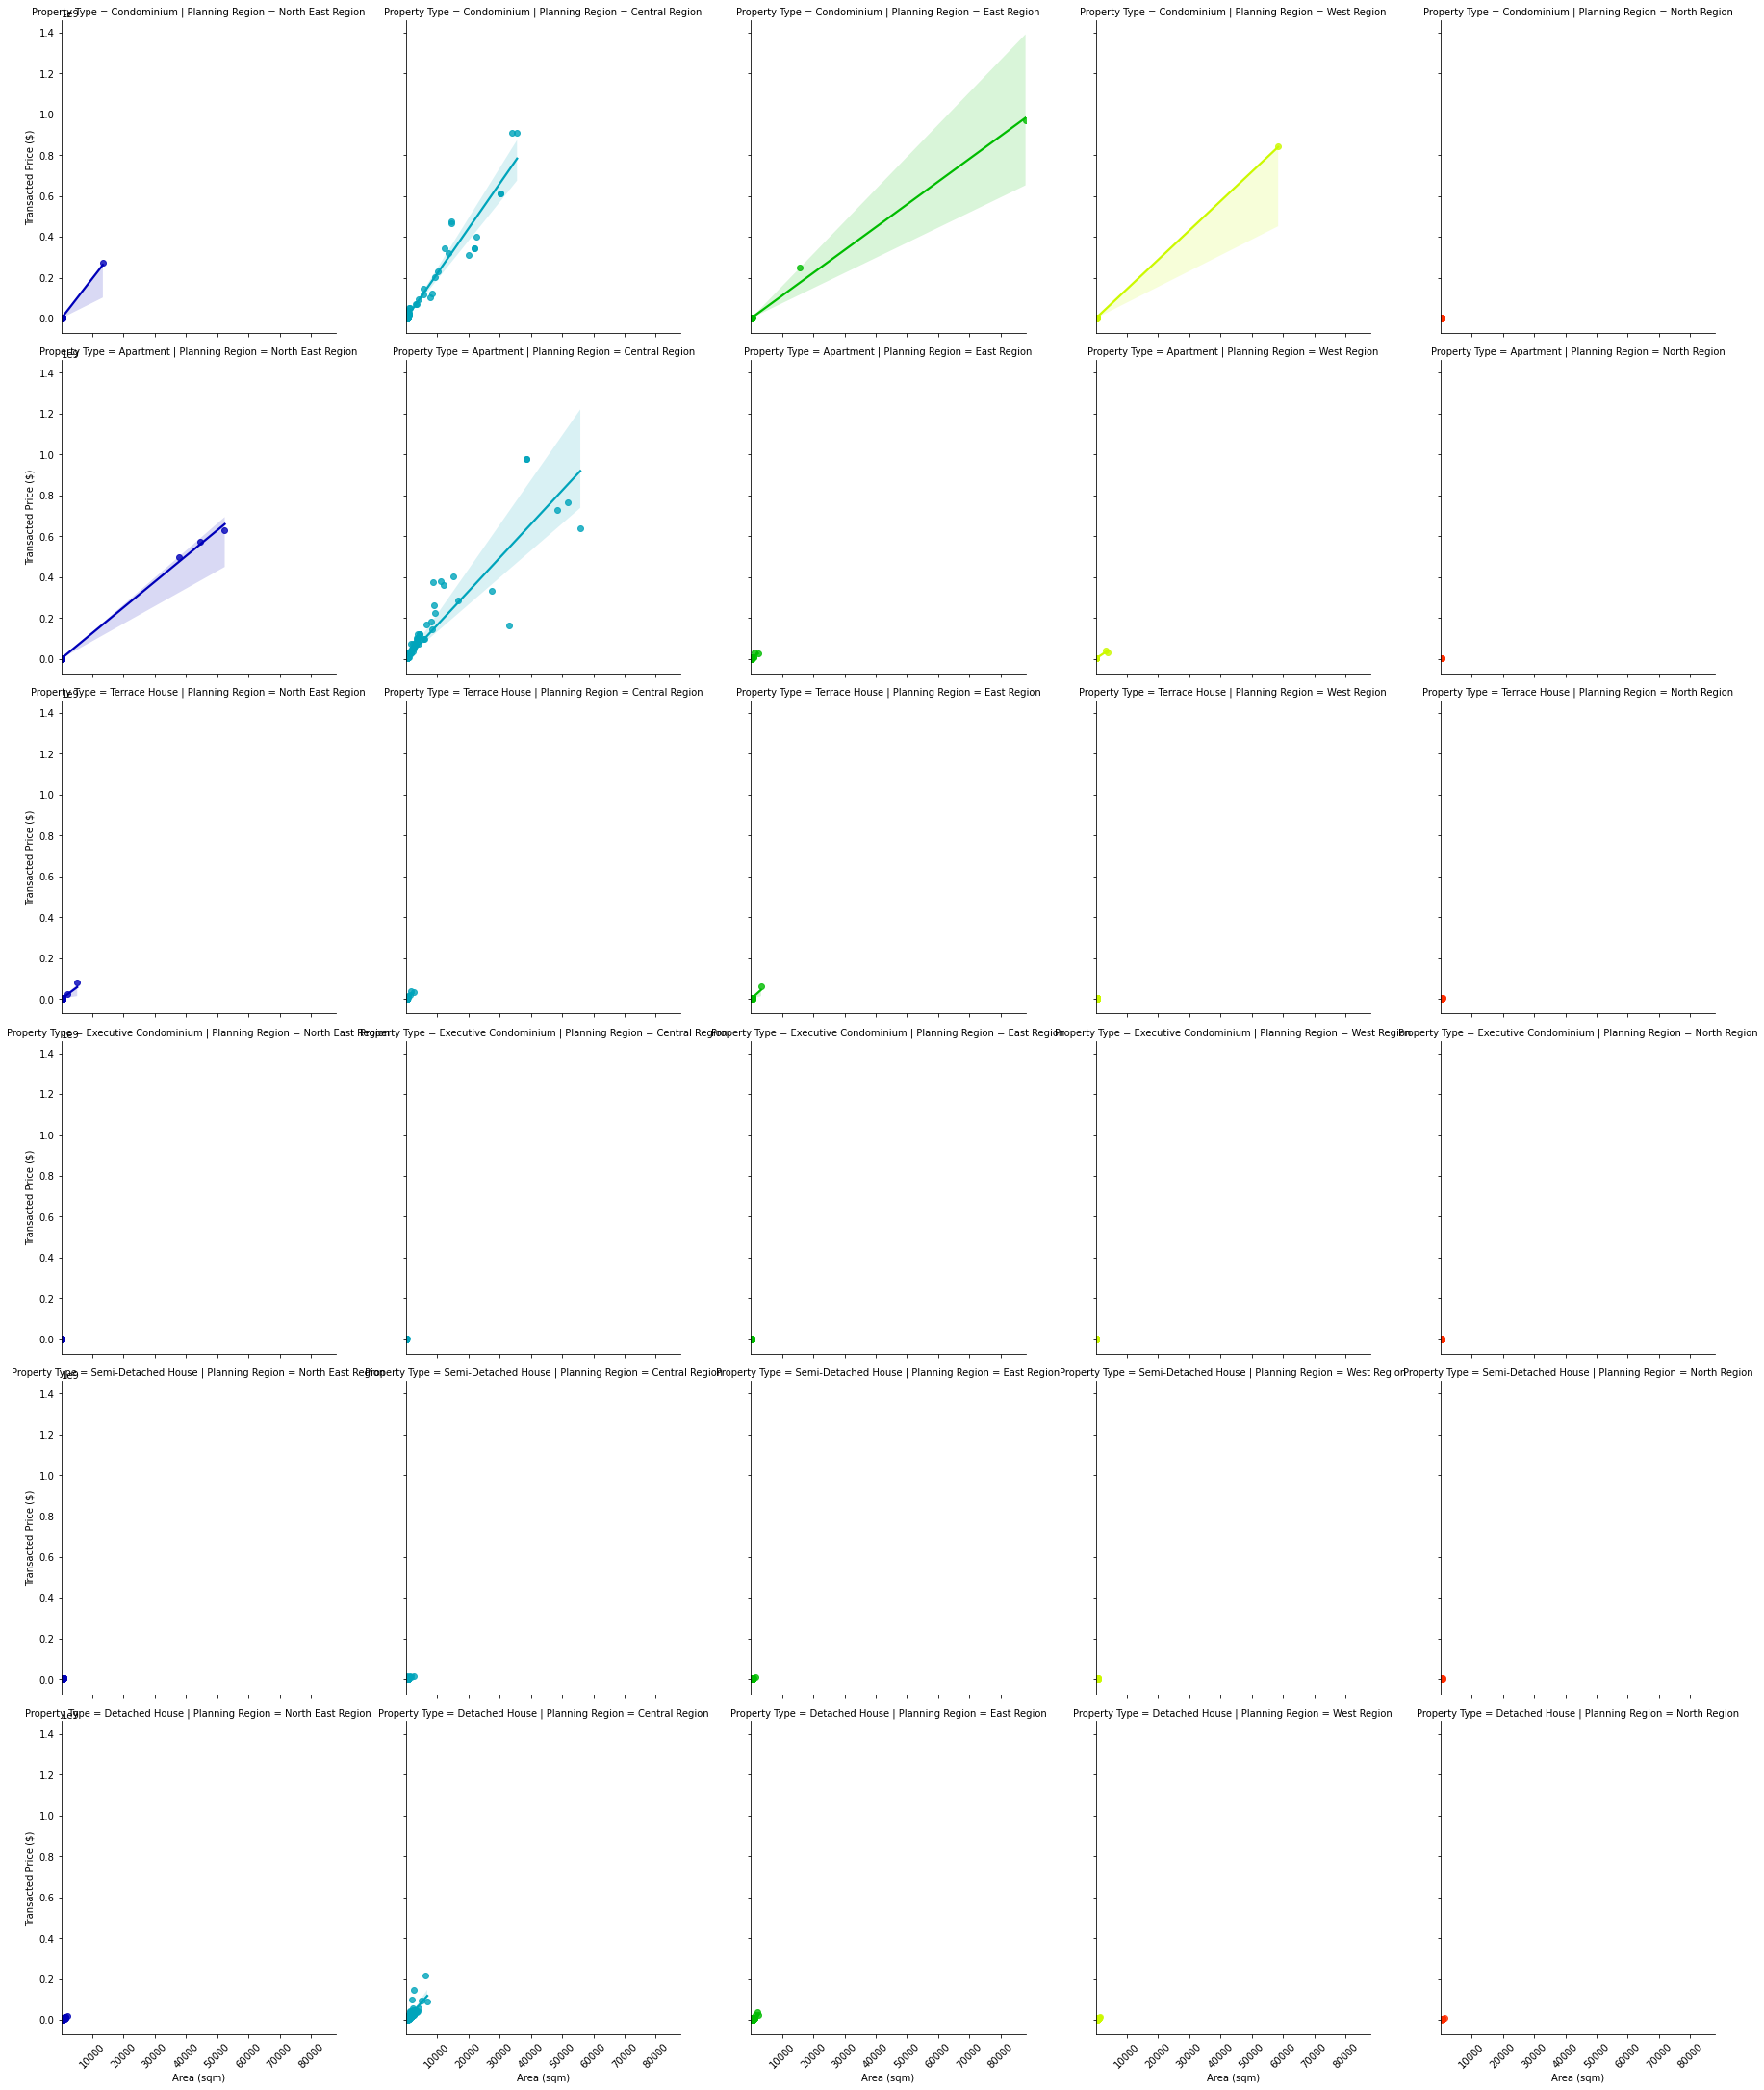

In [18]:
plt.figure(figsize=(10, 6))
g = sns.FacetGrid(data, col="Planning Region", row="Property Type",
                  height=5, aspect=1, hue='Planning Region', palette='nipy_spectral')
g = g.map(sns.regplot, 'Area (sqm)', 'Transacted Price ($)')
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

<Figure size 720x432 with 0 Axes>

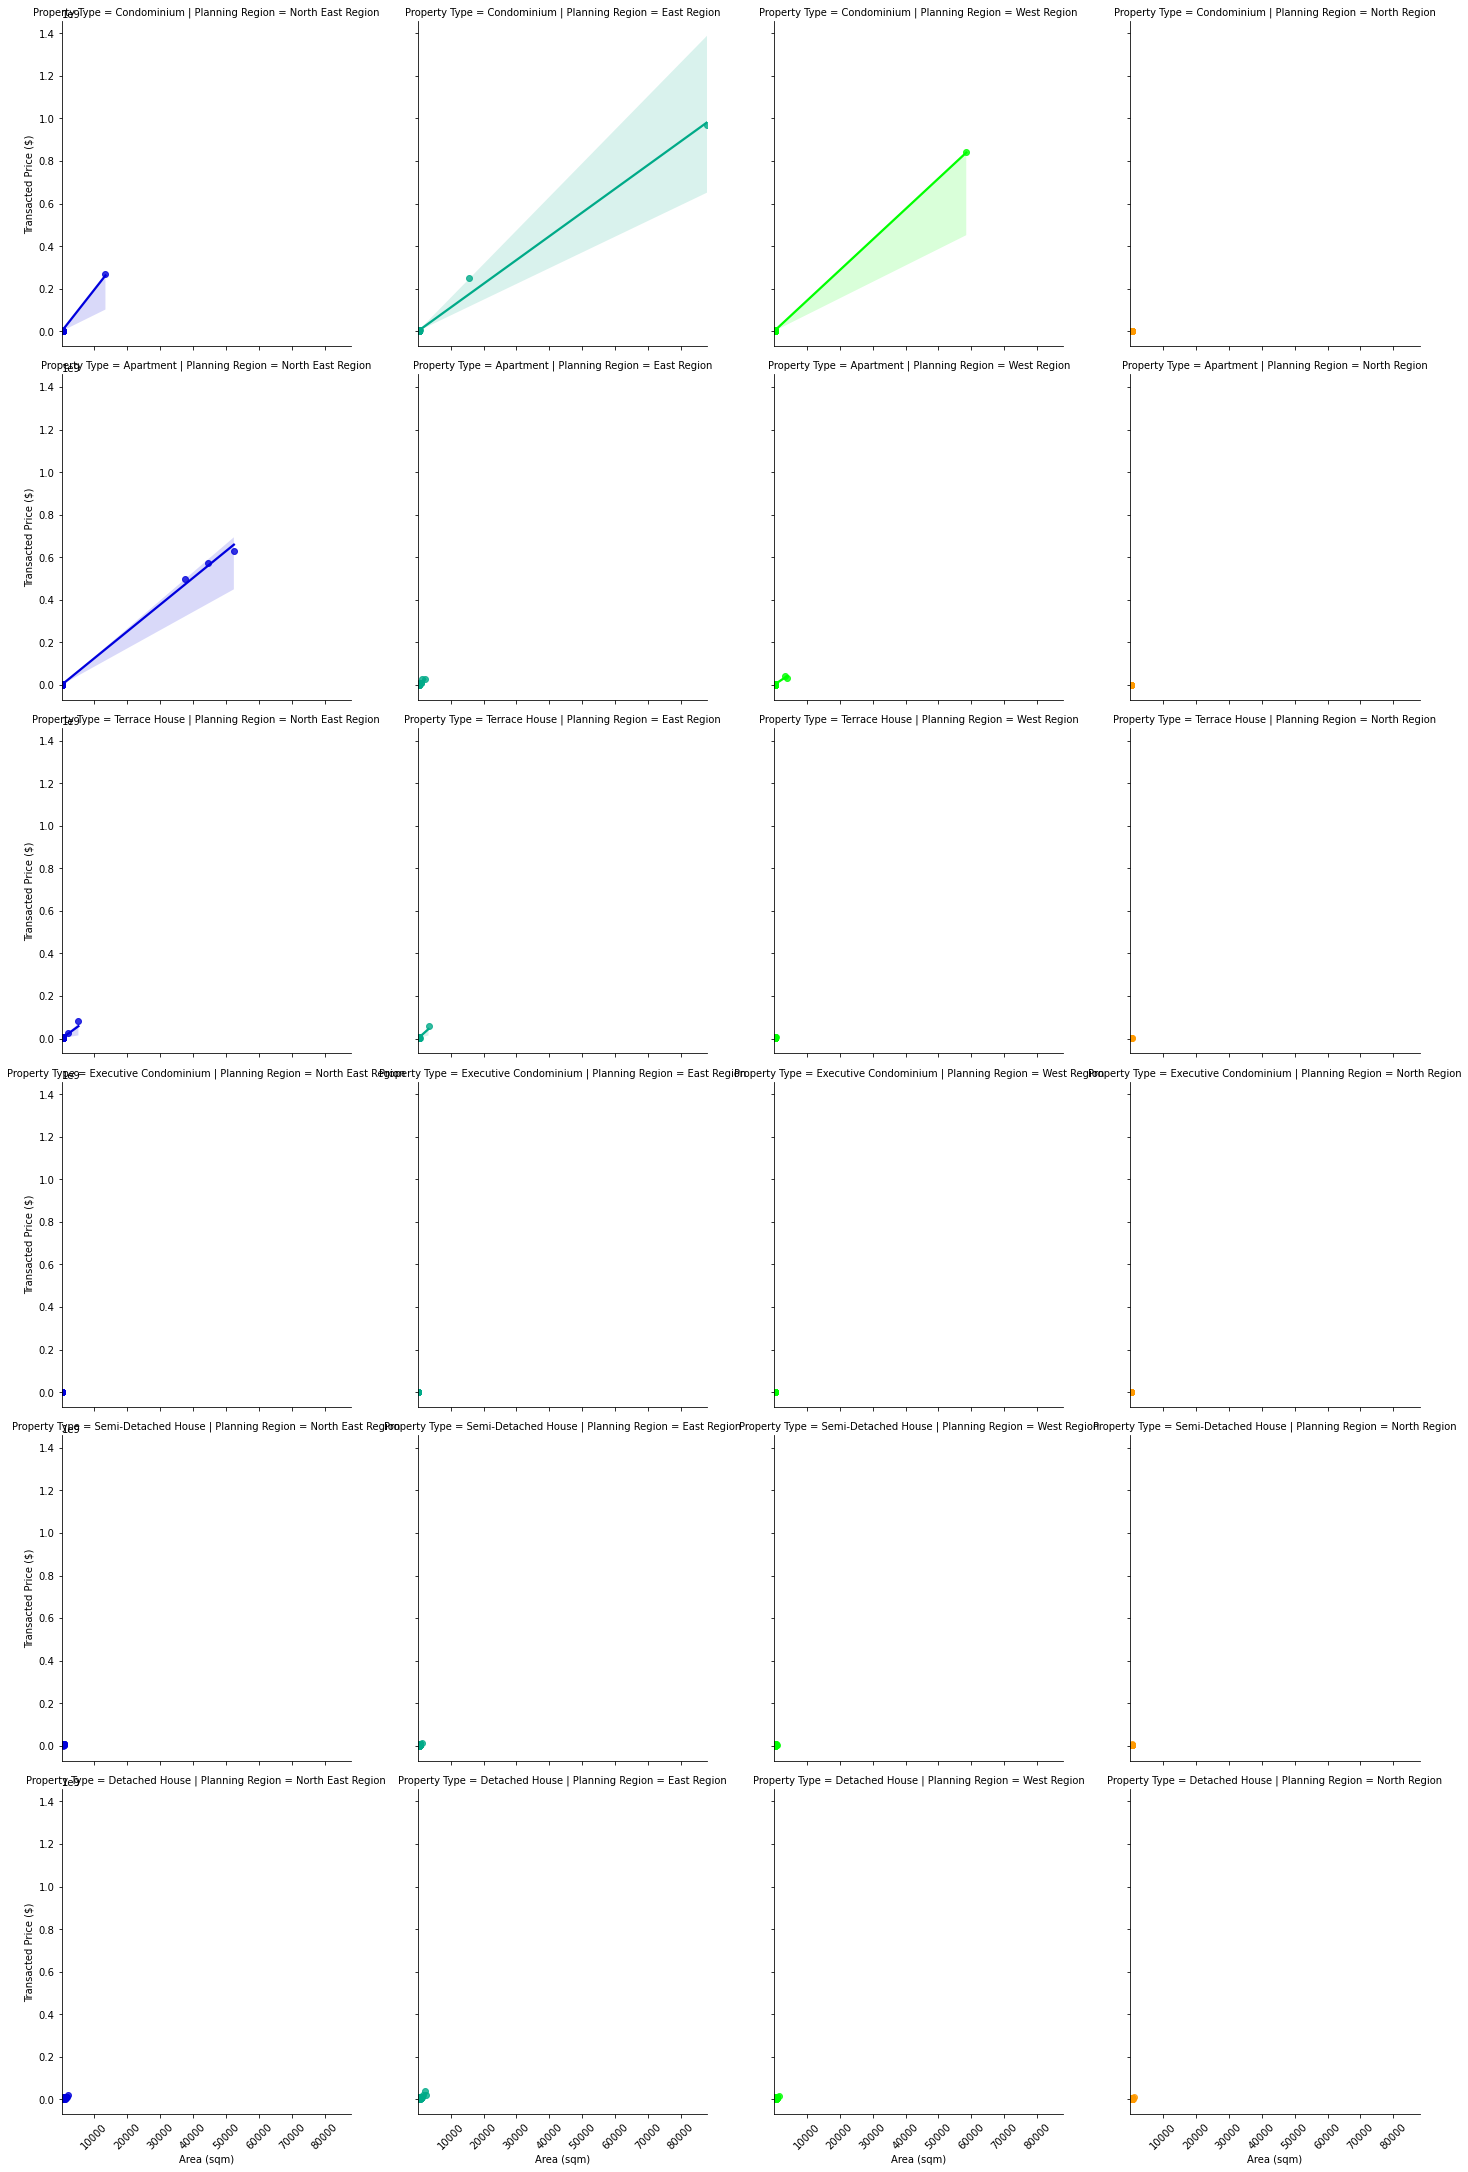

In [19]:
plt.figure(figsize=(10, 6))
g = sns.FacetGrid(data[data['Planning Region'] != 'Central Region'], col="Planning Region",
                  row="Property Type", height=5, aspect=1, hue='Planning Region', palette='nipy_spectral')
g = g.map(sns.regplot, 'Area (sqm)', 'Transacted Price ($)')
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

## 2.2 Feature Engineering

We can enhance the accuracy of the data by extracting additional features to create new inputs for our modelling process.

### 2.2.1 Extracting the floor from the address
The `Address` field contains information about the floor which we can use in our regression.
Thankfully the floors are neatly designated with a preceding "#" character, which allows us to use the `Series.str.split()` method.

We then replace "B1", "B2" and "None" with -1, -2 and 0, respectively. This effectively transforms the floor into a numeric field

In [20]:
address = data['Address'].str.split(pat='#', expand=True)
address

,0,1
0,81 Compassvale Bow,14-01
1,66 Upper Serangoon View,11-15
2,68 Upper Serangoon View,09-21
3,2 Sims Drive,10-10
4,86 St. Patrick'S Road,05-47
...,...,...
115519,52 South Buona Vista Road,05-27
115520,49 Tampines Lane,08-170
115521,41 Hougang Avenue 7,10-12
115522,45 Hougang Avenue 7,12-26


In [21]:
floor = address[1].str.split(pat='-', expand=True)[0]
replace_dict = {'B1': '-1', 'B2': '-2', None: '0'}
floor.replace(to_replace=replace_dict, inplace=True)
floor = pd.Series(pd.to_numeric(floor), name='Floor')

In [22]:
pd.unique(floor)

array([14, 11,  9, 10,  5,  7,  8,  3,  6,  1,  2,  0, 13,  4, 16, 20, 12,
       22, 15, 59, 17, 26, 19, 29, 18, 24, 30, 45, 21, 28, 27, 23, 40, 56,
       32, 39, 51, 49, 25, 48, 34, 33, 46, 47, -1, 35, 31, 38, 44, 42, 36,
       43, 55, 58, 52, 57, 66, 65, 41, 60, 54, 37, 62, 53, 67, 50, -2, 61,
       68, 71, 63, 64, 70, 69], dtype=int64)

Now we append the `floor` data into `data`

In [23]:
data.drop(labels='Address', axis=1, inplace=True)
data = pd.concat([data, floor], axis=1)
data.head()

,Project Name,No. of Units,Area (sqm),Type of Area,Transacted Price ($),Unit Price ($ psm),Unit Price ($ psf),Sale Date,Property Type,Tenure,Completion Date,Type of Sale,Purchaser Address Indicator,Postal District,Postal Sector,Postal Code,Planning Region,Planning Area,Floor
0,JEWEL @ BUANGKOK,1,81,Strata,1150500,14204,1320,2015-03-31,Condominium,99 Yrs From 12/09/2012,Uncompleted,New Sale,Private,19,54,544823,North East Region,Sengkang,14
1,KINGSFORD WATERBAY,1,96,Strata,1173000,12219,1135,2015-03-31,Apartment,99 Yrs From 03/03/2014,Uncompleted,New Sale,HDB,19,53,533885,North East Region,Hougang,11
2,KINGSFORD WATERBAY,1,63,Strata,765000,12143,1128,2015-03-31,Apartment,99 Yrs From 03/03/2014,Uncompleted,New Sale,HDB,19,53,533884,North East Region,Hougang,9
3,SIMS URBAN OASIS,1,43,Strata,663380,15427,1433,2015-03-31,Condominium,99 Yrs From 29/07/2014,Uncompleted,New Sale,HDB,14,38,387386,Central Region,Geylang,10
4,SEVENTY SAINT PATRICK'S,1,81,Strata,1529000,18877,1754,2015-03-31,Condominium,Freehold,Uncompleted,New Sale,HDB,15,42,424184,East Region,Bedok,5


### 2.2.2 - Tenure Date
Length of tenure remaining at the time of transaction could affect pricing. Let's take a look at values this field has.

In [24]:
tenure = data['Tenure']
tenure

0         99 Yrs From 12/09/2012
1         99 Yrs From 03/03/2014
2         99 Yrs From 03/03/2014
3         99 Yrs From 29/07/2014
4                       Freehold
                   ...          
115519    99 Yrs From 10/11/2018
115520    99 Yrs From 29/11/2018
115521    99 Yrs From 31/05/2018
115522    99 Yrs From 31/05/2018
115523    99 Yrs From 19/06/2018
Name: Tenure, Length: 115524, dtype: object

The structure of the values is largely the same, with numbers followed by "Yrs From" and then the start date of the tenure. 

We shall do the following:

1. Split the tenure into two columns containing tenure length and tenure start date with `expand=True`
2. Parse the second column into a `datetime` object
3. Encoding all non-numeric values in the Tenure Length column into a boolean one, `Freehold`. 
4. Clean up the first column by removing extra text and parse into a numeric one using Series.to_numeric

In [25]:
tenure = tenure.str.split(pat=' From ', expand=True)
tenure_date = pd.to_datetime(
    pd.Series(tenure[1], name='Tenure Date'), infer_datetime_format=True)

tenure = pd.Series(tenure[0], name='Tenure Length')
tenure = tenure.str.split(pat=' ', expand=True)[0]
freehold = pd.Series(tenure == 'Freehold', name='Freehold')
tenure.replace(to_replace='Freehold', value=0, inplace=True)
tenure.replace(to_replace='N.A.', value=0, inplace=True)
tenure = pd.Series(pd.to_numeric(tenure), name='Tenure Length')

In [26]:
data = pd.concat([data, tenure, tenure_date, freehold], axis=1)
data.drop(labels='Tenure', inplace=True, axis=1)
data.head(10)

,Project Name,No. of Units,Area (sqm),Type of Area,Transacted Price ($),Unit Price ($ psm),Unit Price ($ psf),Sale Date,Property Type,Completion Date,...,Purchaser Address Indicator,Postal District,Postal Sector,Postal Code,Planning Region,Planning Area,Floor,Tenure Length,Tenure Date,Freehold
0,JEWEL @ BUANGKOK,1,81,Strata,1150500,14204,1320,2015-03-31,Condominium,Uncompleted,...,Private,19,54,544823,North East Region,Sengkang,14,99,2012-12-09,False
1,KINGSFORD WATERBAY,1,96,Strata,1173000,12219,1135,2015-03-31,Apartment,Uncompleted,...,HDB,19,53,533885,North East Region,Hougang,11,99,2014-03-03,False
2,KINGSFORD WATERBAY,1,63,Strata,765000,12143,1128,2015-03-31,Apartment,Uncompleted,...,HDB,19,53,533884,North East Region,Hougang,9,99,2014-03-03,False
3,SIMS URBAN OASIS,1,43,Strata,663380,15427,1433,2015-03-31,Condominium,Uncompleted,...,HDB,14,38,387386,Central Region,Geylang,10,99,2014-07-29,False
4,SEVENTY SAINT PATRICK'S,1,81,Strata,1529000,18877,1754,2015-03-31,Condominium,Uncompleted,...,HDB,15,42,424184,East Region,Bedok,5,0,NaT,True
5,KINGSFORD WATERBAY,1,63,Strata,780000,12381,1150,2015-03-31,Apartment,Uncompleted,...,HDB,19,53,533878,North East Region,Hougang,7,99,2014-03-03,False
6,KINGSFORD WATERBAY,1,111,Strata,1378000,12414,1153,2015-03-31,Apartment,Uncompleted,...,Private,19,53,533878,North East Region,Hougang,8,99,2014-03-03,False
7,KINGSFORD WATERBAY,1,79,Strata,938000,11873,1103,2015-03-31,Apartment,Uncompleted,...,Private,19,53,533879,North East Region,Hougang,3,99,2014-03-03,False
8,8 NAPIER,1,258,Strata,8575376,33238,3088,2015-03-31,Condominium,2010,...,Private,10,25,258502,Central Region,Tanglin,7,0,NaT,True
9,CLEMENTIWOODS CONDOMINIUM,1,106,Strata,1250000,11792,1096,2015-03-31,Condominium,2010,...,Private,5,12,126817,West Region,Clementi,5,99,2006-07-02,False


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115524 entries, 0 to 115523
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Project Name                 115524 non-null  object        
 1   No. of Units                 115524 non-null  int64         
 2   Area (sqm)                   115524 non-null  int64         
 3   Type of Area                 115524 non-null  object        
 4   Transacted Price ($)         115524 non-null  int64         
 5   Unit Price ($ psm)           115524 non-null  int64         
 6   Unit Price ($ psf)           115524 non-null  int64         
 7   Sale Date                    115524 non-null  datetime64[ns]
 8   Property Type                115524 non-null  object        
 9   Completion Date              115524 non-null  object        
 10  Type of Sale                 115524 non-null  object        
 11  Purchaser Address Indicato

We can now calculate the tenure remaining at point of sale by subtracting the time elapsed between the tenure start date and sale date.

In [28]:
data['Tenure at Sale Date'] = data['Tenure Length'] - \
    (data['Sale Date'].apply(lambda x: x.year) -
     data['Tenure Date'].apply(lambda x: x.year))
data['Tenure at Sale Date'].fillna(value=0, inplace=True)
data['Tenure at Sale Date']

0         96.0
1         98.0
2         98.0
3         98.0
4          0.0
          ... 
115519    97.0
115520    97.0
115521    97.0
115522    97.0
115523    97.0
Name: Tenure at Sale Date, Length: 115524, dtype: float64

With the column completely numerical, this feature is done. We can move on to the next feature, which is the Completion Date

### 2.2.3 Completion Date
Whether the property is already developed or still under construction could have a bearing on the transaction value.

We will do the following:
1. `Completion Date` is a mix of numeric and string data. We need to convert it into numeric data.
2. Create a new column `Transaction Time since Completion` by subtracting the year of completion from the year of sale to get the time elapsed between the completion and sale
3. Use boolean indexing to replace all instances in the new column where `Completion Date` was 0 with 0

In [29]:
pd.unique(data['Completion Date'])

array(['Uncompleted', '2010', '2009', '1994', '2000', '2003', '2006',
       '2013', '2005', 'Unknown', '2004', '2008', '1993', '1990', '1997',
       '2012', '2011', '1996', '1992', '2001', '2007', '1999', '1995',
       '1998', '2002', '1989', '2014', '1983', '2017', '1959', '2016',
       '1981', '1976', '1985', '1984', '1975', '1964', '1986', '1991',
       '2015', '1972', '1978', '1967', '1930', '1988', '1962', '1973',
       '1987', '1968', '1982', '1960', '1965', '1952', '2018', '1977',
       '1979', '1969', '1957', '1929', '1958', '1980', '1948', '1963',
       '1974', '1955', '2019', '1971', '1956', '1939', '1966', '1954',
       '1953', '1970', '2020', '1938', '1951', '1932', '1961', '1950',
       '1941', '1934', '1931'], dtype=object)

In [30]:
data['Completion Date'] = pd.to_numeric(
    data['Completion Date'], errors='coerce')
data['Completion Date'].fillna(value=0, inplace=True)

In [31]:
data['Completion Date']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
115519    0.0
115520    0.0
115521    0.0
115522    0.0
115523    0.0
Name: Completion Date, Length: 115524, dtype: float64

In [32]:
data['Transaction Time since Completion'] = data['Sale Date'].apply(
    lambda x: x.year) - data['Completion Date']
data['Transaction Time since Completion'].loc[(
    data['Completion Date'] == 0)] = 0
data['Transaction Time since Completion']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
115519    0.0
115520    0.0
115521    0.0
115522    0.0
115523    0.0
Name: Transaction Time since Completion, Length: 115524, dtype: float64

In [33]:
data['Transaction Time since Completion'].describe()

count    115524.000000
mean          5.729693
std           9.328598
min          -4.000000
25%           0.000000
50%           0.000000
75%           9.000000
max          90.000000
Name: Transaction Time since Completion, dtype: float64

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115524 entries, 0 to 115523
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Project Name                       115524 non-null  object        
 1   No. of Units                       115524 non-null  int64         
 2   Area (sqm)                         115524 non-null  int64         
 3   Type of Area                       115524 non-null  object        
 4   Transacted Price ($)               115524 non-null  int64         
 5   Unit Price ($ psm)                 115524 non-null  int64         
 6   Unit Price ($ psf)                 115524 non-null  int64         
 7   Sale Date                          115524 non-null  datetime64[ns]
 8   Property Type                      115524 non-null  object        
 9   Completion Date                    115524 non-null  float64       
 10  Type of Sale        

----

# 3 Preprocessing

In any Machine Learning process, Preprocessing is that step in which the data gets transformed, or Encoded, to bring it to such a state that now the machine can easily parse it. In other words, the features of the data can now be easily interpreted by the algorithm.

First, we will scale numerical data in the dataset to adjust for the effect of differences in scale.

Next, we will do one-hot encoding on categorical data that is not ordinal in nature.

The following features are no longer needed as they don't readily give us additional information.

In [35]:
# Temporary drop all unengineered/unneeded features
to_drop = ['Project Name',
           'No. of Units',
           'Unit Price ($ psm)',
           'Unit Price ($ psf)',
           'Sale Date',
           'Completion Date',
           'Postal District',
           'Postal Sector',
           'Postal Code',
           'Tenure Length',
           'Tenure Date']
data.drop(labels=to_drop, axis=1, inplace=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115524 entries, 0 to 115523
Data columns (total 12 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Area (sqm)                         115524 non-null  int64  
 1   Type of Area                       115524 non-null  object 
 2   Transacted Price ($)               115524 non-null  int64  
 3   Property Type                      115524 non-null  object 
 4   Type of Sale                       115524 non-null  object 
 5   Purchaser Address Indicator        115524 non-null  object 
 6   Planning Region                    115524 non-null  object 
 7   Planning Area                      115524 non-null  object 
 8   Floor                              115524 non-null  int64  
 9   Freehold                           115524 non-null  bool   
 10  Tenure at Sale Date                115524 non-null  float64
 11  Transaction Time since Completion  1155

## 3.1 Normalising and Transforming Numerical Columns

We use `RobustScaler()` with `quantile_range(25,75)` to deal with the outliers.

Unlike the other scalers, the centering and scaling statistics of `RobustScaler()` are based on percentiles and are therefore not influenced by a few number of very large marginal outliers. Consequently, the resulting range of the transformed feature values is larger than for the previous scalers and, more importantly, are approximately similar.

In [37]:
numeric_data = data.select_dtypes(include=[np.number, 'bool'])
numeric_data

,Area (sqm),Transacted Price ($),Floor,Freehold,Tenure at Sale Date,Transaction Time since Completion
0,81,1150500,14,False,96.0,0.0
1,96,1173000,11,False,98.0,0.0
2,63,765000,9,False,98.0,0.0
3,43,663380,10,False,98.0,0.0
4,81,1529000,5,True,0.0,0.0
...,...,...,...,...,...,...
115519,56,916000,5,False,97.0,0.0
115520,96,1342112,8,False,97.0,0.0
115521,48,734000,10,False,97.0,0.0
115522,48,735000,12,False,97.0,0.0


In [38]:
scaler = RobustScaler(quantile_range=(25, 75))
scaler.fit(data[numeric_data.columns])
scaled = scaler.transform(data[numeric_data.columns])

for i, col in enumerate(numeric_data.columns):
    data[col] = scaled[:, i]

## 3.2 One-hot encoding categorical data

Since the categorical data is not ordinal, we need to one-hot encode them using `pandas.get_dummies()`

In [39]:
one_hot_features = data.select_dtypes(include='object')
one_hot_encoded = pd.get_dummies(one_hot_features)
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115524 entries, 0 to 115523
Data columns (total 59 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   Type of Area_Land                    115524 non-null  uint8
 1   Type of Area_Strata                  115524 non-null  uint8
 2   Property Type_Apartment              115524 non-null  uint8
 3   Property Type_Condominium            115524 non-null  uint8
 4   Property Type_Detached House         115524 non-null  uint8
 5   Property Type_Executive Condominium  115524 non-null  uint8
 6   Property Type_Semi-Detached House    115524 non-null  uint8
 7   Property Type_Terrace House          115524 non-null  uint8
 8   Type of Sale_New Sale                115524 non-null  uint8
 9   Type of Sale_Resale                  115524 non-null  uint8
 10  Type of Sale_Sub Sale                115524 non-null  uint8
 11  Purchaser Address Indicator_HDB      11

Now we drop the original categorical column and `concat` the one hot columns.

In [40]:
fdf = data.drop(one_hot_features, axis=1)
fdf = pd.concat([fdf, one_hot_encoded], axis=1)
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115524 entries, 0 to 115523
Data columns (total 65 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Area (sqm)                           115524 non-null  float64
 1   Transacted Price ($)                 115524 non-null  float64
 2   Floor                                115524 non-null  float64
 3   Freehold                             115524 non-null  float64
 4   Tenure at Sale Date                  115524 non-null  float64
 5   Transaction Time since Completion    115524 non-null  float64
 6   Type of Area_Land                    115524 non-null  uint8  
 7   Type of Area_Strata                  115524 non-null  uint8  
 8   Property Type_Apartment              115524 non-null  uint8  
 9   Property Type_Condominium            115524 non-null  uint8  
 10  Property Type_Detached House         115524 non-null  uint8  
 11  Property Type

## 3.3 - Train/Test Split

In [41]:
Y_fdf = fdf['Transacted Price ($)']
X_fdf = fdf.drop('Transacted Price ($)', axis=1)
X_fdf.shape, Y_fdf.shape

((115524, 64), (115524,))

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_fdf, Y_fdf, test_size=0.3, random_state=34)

In [43]:
# Training set
X_train.shape, Y_train.shape

((80866, 64), (80866,))

In [44]:
# Testing set
X_test.shape, Y_test.shape

((34658, 64), (34658,))

----

# 4 - Modelling

With the data ready, we shall start to fit models to them and see if we can develop a model that satisfactorily explains transaction prices.

Firstly, we define a function to return a `pandas.Series` containing the following regression error measures:

- Root mean square error (RMSE)
- Mean absolute error (MAE)
- R-squared (r2)

We also definte a function to plot predicted values against actual values.

In [45]:
def regression_metrics(y_true, y_pred, name):
    """
    Returns pandas.Series of RMSE, MAE and R^2 of model results
    """
    import pandas as pd
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    rmse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print("The root mean square error of the model is {}".format(rmse))
    print("The mean absolute error of the model is {}".format(mae))
    print("The R square of the model is {}".format(r2))
    result_dict = {'RMSE': rmse, 'MAE': mae, 'R-Square': r2}
    return pd.Series(result_dict, name=name)

In [46]:
def regression_plot(y_true, y_pred, name):
    """
    Draws scatterplot of predicted values against actual values
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, cmap='plasma', alpha=0.5)
    plt.xlabel('Prediction')
    plt.ylabel('Real value')
    plt.title(name)
    diagonal = np.linspace(0, np.max(y_true), 100)
    plt.plot(diagonal, diagonal, '-r')
    plt.show()

We will be training the following regressors on our pre-processed dataset.

- `LinearRegression()`
- `Lasso()`
- `Ridge()`
- `RandomForestRegressor()`
- `ElasticNet()`
- `SGDRegressor()`
- `LassoLars()`
- `LinearSVR`

## 4.1 - Linear Regression

Linear regression is probably one of the most important and widely used regression techniques. It’s among the simplest regression methods. A key advantage is ease of interpretability, since it assigns a coefficient to each variable in the data.

In [47]:
results = pd.DataFrame()
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
Y_pred_lin = linreg.predict(X_test)
linreg_metrics = regression_metrics(
    Y_test, Y_pred_lin, name='Linear Regression')
linreg_metrics

The root mean square error of the model is 28.578693430574127
The mean absolute error of the model is 0.5113325829391641
The R square of the model is 0.872844714343906


RMSE        28.578693
MAE          0.511333
R-Square     0.872845
Name: Linear Regression, dtype: float64

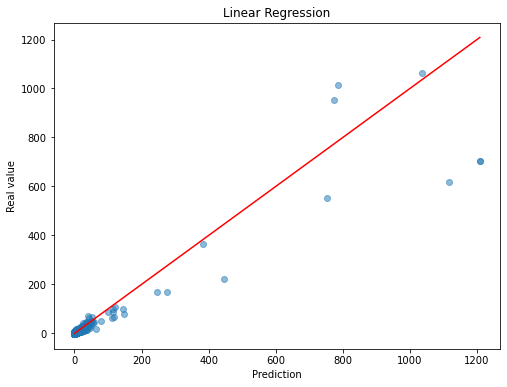

In [48]:
regression_plot(Y_test, Y_pred_lin, name='Linear Regression')

## 4.2 - Lasso Regression

**Lasso and Ridge Regression Comparison**

![lasso vs ridge](images/lasso_vs_ridge_regression.png)

*Source: [Medium](https://medium.com/@davidsotunbo/ridge-and-lasso-regression-an-illustration-and-explanation-using-sklearn-in-python-4853cd543898)*

“LASSO” stands for <u>**L**</u>east <u>**A**</u>bsolute <u>**S**</u>hrinkage and <u>**S**</u>election <u>**O**</u>perator.

Lasso regression is a type of linear regression that uses a **shrinkage estimator**. A shrinkage estimator is a new estimate produced by shrinking a raw estimate (like the sample mean). Two extreme mean values can be combined to make one more centralized mean value; If this is repeated for all means in a sample, the result is a revised sample mean that has “shrunk” towards the true population mean.

The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). It achieves this through [L1 regularization](http://enhancedatascience.com/2017/07/04/machine-learning-explained-regularization/), which applies a penalty to the sum of the absolute values of the coefficients of the model parameters.

\begin{equation*}
ERROR_{L1}=ERROR + \sum_{i=0}^N |\beta_i| \\
\text{Where } \beta_i \text{ are the parameter coefficients}\\
\end{equation*}

L1 regularization will shrink some parameters to zero, and could help in feature selection.

In [49]:
alpha = 0.00099
lasso_regr = Lasso(alpha=alpha, max_iter=50000)
lasso_regr.fit(X_train, Y_train)
Y_pred_lasso = lasso_regr.predict(X_test)
lasso_metrics = regression_metrics(
    Y_test, Y_pred_lasso, name='Lasso Regression')
lasso_metrics

The root mean square error of the model is 28.582801239049367
The mean absolute error of the model is 0.5052376559853705
The R square of the model is 0.8728264374565682


RMSE        28.582801
MAE          0.505238
R-Square     0.872826
Name: Lasso Regression, dtype: float64

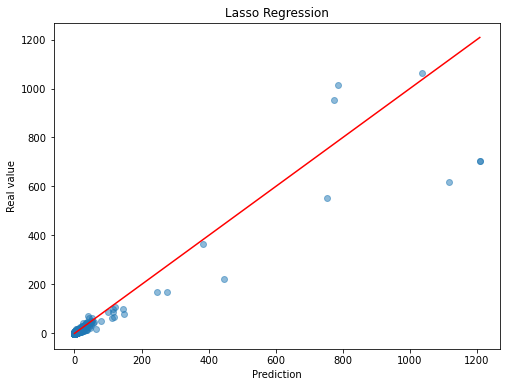

In [50]:
regression_plot(Y_test, Y_pred_lasso, name='Lasso Regression')

## 4.3 - Ridge Regression

Ridge Regression is a similar method, but instead uses L2 regularization, which applies a penalty to the sum of the squared values of the model parameter coefficients.

It will not force parameters to be zero, but some will become relative small.

\begin{equation*}
ERROR_{L2}=ERROR + \sum_{i=0}^N \beta_i^2 \\
\text{Where } \beta_i \text{ are the parameter coefficients}\\
\end{equation*}

In [51]:
ridge = Ridge(alpha=0.01, normalize=True)
ridge.fit(X_train, Y_train)
Y_pred_ridge = ridge.predict(X_test)
ridge_metrics = regression_metrics(
    Y_test, Y_pred_ridge, name='Ridge Regression')
ridge_metrics

The root mean square error of the model is 29.06798730915617
The mean absolute error of the model is 0.5092756999103254
The R square of the model is 0.8706676972926535


RMSE        29.067987
MAE          0.509276
R-Square     0.870668
Name: Ridge Regression, dtype: float64

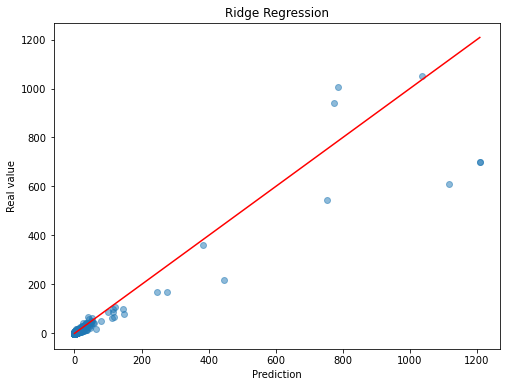

In [52]:
regression_plot(Y_test, Y_pred_ridge, name='Ridge Regression')

## 4.4 - Elastic Net

The Elastic Net regression solves problems present in L1 regularization (also called Lasso) and L2 regularization (also called Ridge).

The Lasso method restricts the coefficients to a square shape (or an L1 sphere) which diagonals are equal to 2t. The Ridge method restricts the coefficients to a circle (or an L2 sphere) of radius t. The Elastic Net falls somewhere in between the two.

![Elastic Net](images/elastic_net.png)

This is achieved by allocating weights to the penalties resulting from each of L1 and L2 regularization. Lambda is a shared penalization parameter and alpha sets the ratio between L1 and L2.

\begin{equation*}
ERROR_{L1,L2}=ERROR+\lambda((1-\alpha)\sum_0^N \beta_i^2 +\alpha\sum_0^N |\beta_i|)\\
\text{Where } \beta_i \text{ are the parameter coefficients}\\
\end{equation*}

In [53]:
elastic_regr = ElasticNet()
elastic_regr.fit(X_train, Y_train)
Y_pred_elastic = elastic_regr.predict(X_test)
elastic_metrics = regression_metrics(
    Y_test, Y_pred_elastic, name='Elastic Net')
elastic_metrics

The root mean square error of the model is 29.854995449211334
The mean absolute error of the model is 0.7083021167118694
The R square of the model is 0.8671660590842627


RMSE        29.854995
MAE          0.708302
R-Square     0.867166
Name: Elastic Net, dtype: float64

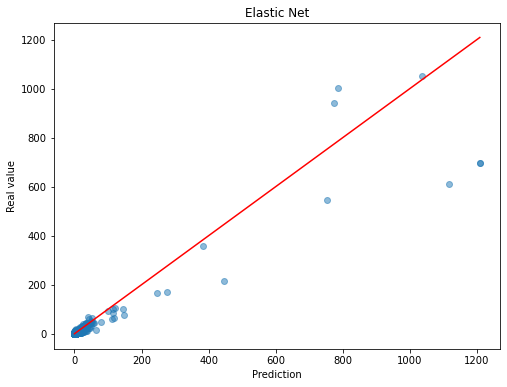

In [54]:
regression_plot(Y_test, Y_pred_elastic, name='Elastic Net')

## 4.5 - Stochastic Gradient Descent (SGD)

![SGD](images/sgd.png)

SGD an iterative optimization algorithm for finding the minimum of a function. The algorithm takes steps proportional to the negative gradient of the function at the current point. It is a very popular and common algorithm used in various Machine Learning algorithms, most importantly forms the basis of Neural Networks.

This algorithm is very sensitive to the learning rate, which is affected by `eta0`. Too high a learning rate will result in instability of the model, leading to wildly different results in each iteration. Too low a learning rate will result in a longer time required to converge towards an optimal result.

In [55]:
sgd = SGDRegressor(loss="epsilon_insensitive", max_iter=1000,
                   tol=0.001, power_t=0.5, epsilon=0.01, alpha=0.0001,eta0=0.005)
sgd.fit(X_train, Y_train)
Y_pred_sgd = sgd.predict(X_test)
sgd_metrics = regression_metrics(Y_test, Y_pred_sgd, name='SGD')
sgd_metrics

The root mean square error of the model is 37.17944044182401
The mean absolute error of the model is 0.4815092558395882
The R square of the model is 0.8345773790744326


RMSE        37.179440
MAE          0.481509
R-Square     0.834577
Name: SGD, dtype: float64

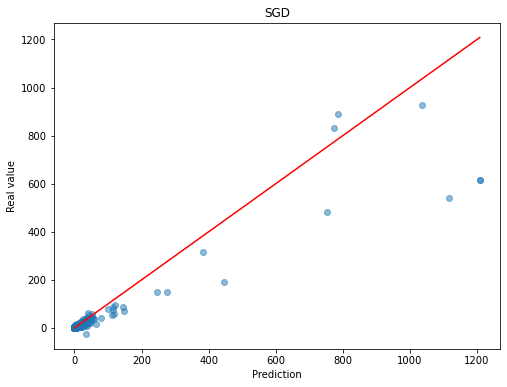

In [56]:
regression_plot(Y_test, Y_pred_sgd, name='SGD')

## 4.6 - Random Forest

**Random Forest Illustration**
![Random Forest](images/random_forest.png)
*Source: [Alteryx Community](https://community.alteryx.com/t5/Alteryx-Designer-Knowledge-Base/Seeing-the-Forest-for-the-Trees-An-Introduction-to-Random-Forest/ta-p/158062)*

A random forest is the result of combination of many decision trees into a single model. Individually, predictions made by decision trees (or humans) may not be accurate, but combined together, the predictions will be closer to the mark on average.

In [57]:
rf_regr = RandomForestRegressor()
rf_regr.fit(X_train, Y_train)
Y_pred_rf = rf_regr.predict(X_test)
rf_metrics = regression_metrics(Y_test, Y_pred_rf, name='Random Forest')
rf_metrics

The root mean square error of the model is 18.60295807420216
The mean absolute error of the model is 0.22423394551567186
The R square of the model is 0.917229790307947


RMSE        18.602958
MAE          0.224234
R-Square     0.917230
Name: Random Forest, dtype: float64

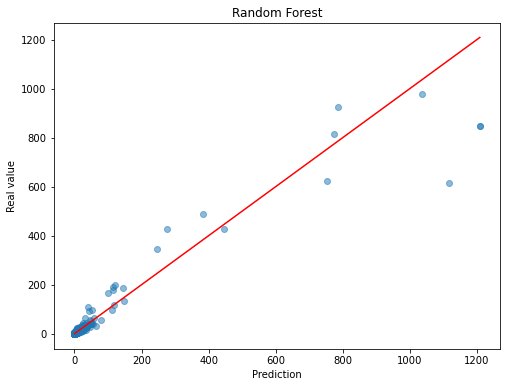

In [58]:
regression_plot(Y_test, Y_pred_rf, name='Random Forest')

## 4.7 - Lasso with Least Angle Regression (LARS)

![LassoLars](images\lassolars.png)

This is a lasso model implemented using the LARS algorithm, and unlike the implementation based on coordinate descent, this yields the exact solution, which is piecewise linear as a function of the norm of its coefficients.

In [59]:
LARS = LassoLars(alpha=.0001)
LARS.fit(X_train, Y_train)
Y_pred_LARS = LARS.predict(X_test)
LARS_metrics = regression_metrics(Y_test, Y_pred_LARS, name='LARS')
LARS_metrics

The root mean square error of the model is 28.801765486654237
The mean absolute error of the model is 0.514700659070275
The R square of the model is 0.871852199025399


RMSE        28.801765
MAE          0.514701
R-Square     0.871852
Name: LARS, dtype: float64

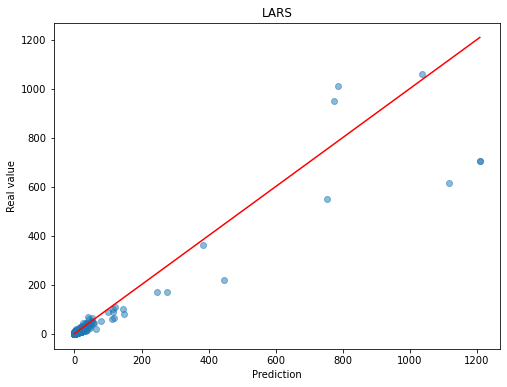

In [60]:
regression_plot(Y_test, Y_pred_LARS, name='LARS')

## 4.8 - LinearSVR

Support vector regression (SVR) and support vector classification (SVC) are popular learning techniques. In this case, this is a linear version of SVR. It takes lesser time to train and test than a normal SVR.

In [61]:
linear_svr_regr = svm.LinearSVR()
linear_svr_regr.fit(X_train, Y_train)
Y_pred_svr = linear_svr_regr.predict(X_test)
svr_metrics = regression_metrics(Y_test, Y_pred_svr, name='LinearSVR')
svr_metrics

The root mean square error of the model is 34.64566916671068
The mean absolute error of the model is 0.4446166224074496
The R square of the model is 0.8458508969158592


RMSE        34.645669
MAE          0.444617
R-Square     0.845851
Name: LinearSVR, dtype: float64

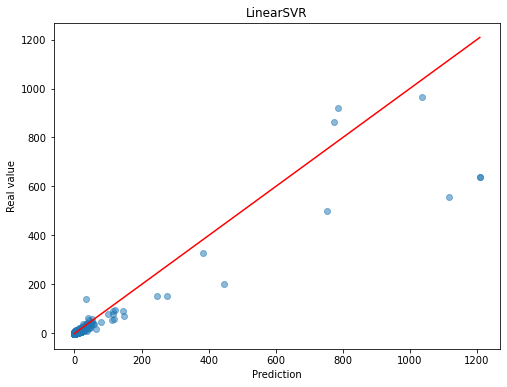

In [62]:
regression_plot(Y_test, Y_pred_svr, name='LinearSVR')

## 4.9 - Next steps

After tabulating all the results, it seems that the random forest has performed the best.



In [63]:
results = pd.concat([linreg_metrics, lasso_metrics, ridge_metrics, rf_metrics,
                     elastic_metrics, sgd_metrics, LARS_metrics, svr_metrics], axis=1).T
results

,RMSE,MAE,R-Square
Linear Regression,28.578693,0.511333,0.872845
Lasso Regression,28.582801,0.505238,0.872826
Ridge Regression,29.067987,0.509276,0.870668
Random Forest,18.602958,0.224234,0.917230
Elastic Net,29.854995,0.708302,0.867166
SGD,37.179440,0.481509,0.834577
LARS,28.801765,0.514701,0.871852
LinearSVR,34.645669,0.444617,0.845851


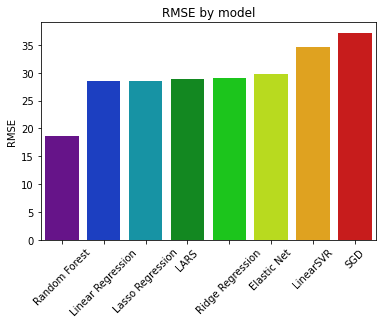

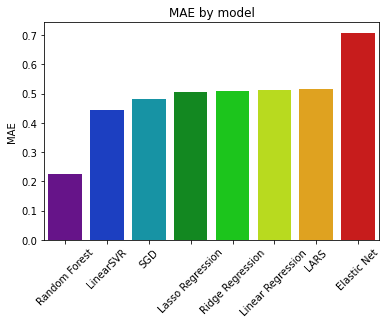

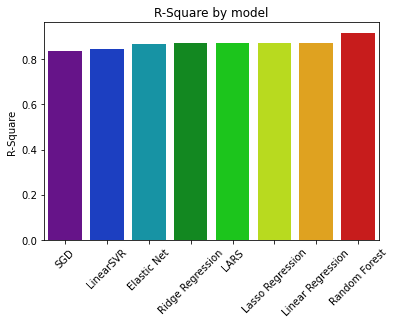

In [64]:
for i in ['RMSE', 'MAE', 'R-Square']:
    g = sns.barplot(data=results.sort_values(i), x=results.sort_values(
        i).index.to_list(), y=i, palette='nipy_spectral')
    plt.xticks(rotation=45)
    plt.title('{} by model'.format(i))
    plt.show()

----

# 5 - Hyperparameter Tuning

Hyperparameters are model-specific properties that are ‘fixed’ even before the model is trained or tested on the data.

The goal is to arrive at the sweet spot for the model’s parameters to optimize performance.

Now we use `RandomizedSearchCV` to tune hyper parameters. Unlike `GridSearchCV`, which applies every combination of a preset list of values of the hyper-parameters to the model, a randomized search is a technique where a finite user-specified number of random combinations of the hyperparameters are used to find the best solution for the built model.

Each model we optimise will follow this procedure

1. First, we view parameters used in our earlier models to get an idea of what to optimise.
2. Set up a dict containing the different values we wish to apply on each parameter we want to perform the search on.
3. Perform the randomized search on the model.
4. Select the best candidate model with the `best_params_` attribute.
5. Use the candidate model to predict the original test data, and compare regression metrics against the prototype model to measure improvement.

## 5.1 - LinearSVR

Here we optimise `LinearSVR()`.

In [65]:
pprint(linear_svr_regr.get_params())

{'C': 1.0,
 'dual': True,
 'epsilon': 0.0,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'loss': 'epsilon_insensitive',
 'max_iter': 1000,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}


In [66]:
svr_loss = ['epsilon_insensitive', 'squared_epsilon_insensitive']
svr_epsilon = [x for x in np.linspace(start=0.3, stop=0.5, num=5)]
svr_intercept_scaling = [x for x in np.linspace(start=0.1, stop=1.0, num=5)]
svr_tol = [x for x in np.linspace(start=0.005, stop=0.015, num=5)]

svr_random_grid = {'loss': svr_loss,
                   'epsilon': svr_epsilon,
                   'intercept_scaling': svr_intercept_scaling,
                   'tol': svr_tol}
pprint(svr_random_grid)

{'epsilon': [0.3, 0.35, 0.4, 0.45, 0.5],
 'intercept_scaling': [0.1, 0.325, 0.55, 0.775, 1.0],
 'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive'],
 'tol': [0.005, 0.0075, 0.009999999999999998, 0.012499999999999999, 0.015]}


**Note:** This step will take a while to run

In [67]:
svr_random = RandomizedSearchCV(estimator=svm.LinearSVR(max_iter=2000),
                                param_distributions=svr_random_grid,
                                n_iter=30,
                                verbose=3,
                                cv=3,
                                n_jobs=-1)
# Fit the random search model
svr_random.fit(X_train, Y_train)

svr_random.best_params_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  6.9min finished


{'tol': 0.005,
 'loss': 'epsilon_insensitive',
 'intercept_scaling': 1.0,
 'epsilon': 0.45}

Let's compare the best candidate against the base model for `LinearSVR`

In [68]:
best_random_svr = svr_random.best_estimator_
Y_pred_random_svr = best_random_svr.predict(X_test)
best_random_svr_metrics = regression_metrics(
    Y_test, Y_pred_random_svr, name='Randomized LinearSVR')
best_random_svr_metrics

The root mean square error of the model is 30.55565369959143
The mean absolute error of the model is 0.4630327668686277
The R square of the model is 0.8640486177571841


RMSE        30.555654
MAE          0.463033
R-Square     0.864049
Name: Randomized LinearSVR, dtype: float64

In [69]:
diff = best_random_svr_metrics - svr_metrics
diff

RMSE       -4.090015
MAE         0.018416
R-Square    0.018198
dtype: float64

## 5.2 - Random Forest
Here, we optimize `RandomForestRegressor()`

In [70]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num=5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 32, 55, 77, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


**Note:** This will take a **REALLY** long time to run

In [71]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                               n_iter=30, cv=3, verbose=3, n_jobs=-1)
# Fit the random search model
rf_random.fit(X_test, Y_test)

rf_random.best_params_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 23.8min finished


{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 77,
 'bootstrap': True}

In [72]:
best_random_rf = rf_random.best_estimator_
Y_pred_random_rf = best_random_rf.predict(X_test)
best_random_rf_metrics = regression_metrics(
    Y_test, Y_pred_random_rf, name='Randomized RandomForest')
best_random_rf_metrics

The root mean square error of the model is 5.367237378328445
The mean absolute error of the model is 0.14620754970470962
The R square of the model is 0.9761195310176324


RMSE        5.367237
MAE         0.146208
R-Square    0.976120
Name: Randomized RandomForest, dtype: float64

In [73]:
diff = best_random_rf_metrics - rf_metrics
diff

RMSE       -13.235721
MAE         -0.078026
R-Square     0.058890
dtype: float64

## 5.3 - Ridge Regression
Here, we optimize `Ridge()`

In [74]:
ridge.get_params()

{'alpha': 0.01,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': True,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [75]:
ridge_alpha = [x for x in np.linspace(start=0.1, stop=0.5, num=5)]
ridge_solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
ridge_tol = [x for x in np.linspace(start=0.4, stop=0.5, num=10)]
random_grid_ridge = {'alpha': ridge_alpha,
                     'solver': ridge_solver,
                     'tol': ridge_tol}
pprint(random_grid_ridge)

{'alpha': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5],
 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
 'tol': [0.4,
         0.41111111111111115,
         0.4222222222222222,
         0.43333333333333335,
         0.4444444444444445,
         0.45555555555555555,
         0.4666666666666667,
         0.47777777777777775,
         0.4888888888888889,
         0.5]}


In [76]:
ridge_random = RandomizedSearchCV(Ridge(),
                                  param_distributions=random_grid_ridge,
                                  n_iter=50,
                                  cv=3,
                                  verbose=3,
                                  n_jobs=-1)
ridge_random.fit(X_test, Y_test)
ridge_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    7.7s finished


{'tol': 0.4666666666666667, 'solver': 'svd', 'alpha': 0.5}

In [77]:
best_random_ridge = ridge_random.best_estimator_
Y_pred_random_ridge = best_random_ridge.predict(X_test)
best_random_ridge_metrics = regression_metrics(
    Y_test, Y_pred_random_ridge, name='Randomized Ridge Regression')
best_random_ridge_metrics

The root mean square error of the model is 24.861671624402195
The mean absolute error of the model is 0.5408453339912767
The R square of the model is 0.8893828731194952


RMSE        24.861672
MAE          0.540845
R-Square     0.889383
Name: Randomized Ridge Regression, dtype: float64

In [78]:
diff = best_random_ridge_metrics - ridge_metrics
diff

RMSE       -4.206316
MAE         0.031570
R-Square    0.018715
dtype: float64

## 5.4 - Lasso with Least Angle Regression
Here, we optimize `LassoLars()`

In [79]:
LARS.get_params()

{'alpha': 0.0001,
 'copy_X': True,
 'eps': 2.220446049250313e-16,
 'fit_intercept': True,
 'fit_path': True,
 'max_iter': 500,
 'normalize': True,
 'positive': False,
 'precompute': 'auto',
 'verbose': False}

In [80]:
lassolars_alpha = [x for x in np.linspace(start=5e-5, stop=50e-5, num=9)]
lassolars_eps = [x for x in np.linspace(start=2e-16, stop=1e-15, num=5)]
random_grid_lassolars = {'alpha': lassolars_alpha,
                         'eps': lassolars_eps}
random_grid_lassolars

{'alpha': [5e-05,
  0.00010625000000000001,
  0.0001625,
  0.00021875,
  0.000275,
  0.00033125,
  0.00038750000000000004,
  0.00044375,
  0.0005],
 'eps': [2e-16, 4e-16, 6.000000000000001e-16, 8.000000000000001e-16, 1e-15]}

In [81]:
lassolars_random = RandomizedSearchCV(LassoLars(max_iter=1000),
                                      param_distributions=random_grid_lassolars,
                                      n_iter=30,
                                      cv=3,
                                      verbose=3,
                                      n_jobs=-1)
lassolars_random.fit(X_test, Y_test)
lassolars_random.best_params_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.6s finished


{'eps': 1e-15, 'alpha': 0.00010625000000000001}

In [82]:
best_random_lassolars = lassolars_random.best_estimator_
Y_pred_random_lassolars = best_random_lassolars.predict(X_test)
best_random_lassolars_metrics = regression_metrics(
    Y_test, Y_pred_random_lassolars, name='Randomized Lasso with Least Angle Regression')
best_random_lassolars_metrics

The root mean square error of the model is 24.891675868102336
The mean absolute error of the model is 0.5371259463307846
The R square of the model is 0.8892493751277883


RMSE        24.891676
MAE          0.537126
R-Square     0.889249
Name: Randomized Lasso with Least Angle Regression, dtype: float64

In [83]:
diff = best_random_lassolars_metrics - LARS_metrics
diff

RMSE       -3.910090
MAE         0.022425
R-Square    0.017397
dtype: float64

## 5.5 - SGD

Here, we optimise `SGDRegressor()`

In [84]:
sgd.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.01,
 'eta0': 0.005,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'epsilon_insensitive',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [85]:
sgd_alpha = [x for x in np.linspace(start=7e-4,stop=8e-4,num=10)]
sgd_power_t = [x for x in np.linspace(start=0.35,stop=0.45,num=10)]
sgd_learning_rate = ['invscaling','constant','optimal','adaptive']
sgd_eta0 = [x for x in np.linspace(start=0.005,stop=0.01,num=5)]
sgd_epsilon = [x for x in np.linspace(start=0.8,stop=0.85,num=10)]
sgd_tol = [x for x in np.linspace(start=0.009,stop=0.01,num=10)]
sgd_loss = ['squared_loss','huber','epsilon_insensitive','squared_epsilon_insensitive']

random_grid_sgd = {'alpha':sgd_alpha,
                  'power_t':sgd_power_t,
                  'learning_rate':sgd_learning_rate,
                  'eta0':sgd_eta0,
                  'epsilon':sgd_epsilon,
                  'tol':sgd_tol,
                  'loss':sgd_loss}
pprint(random_grid_sgd)

{'alpha': [0.0007,
           0.0007111111111111111,
           0.0007222222222222222,
           0.0007333333333333333,
           0.0007444444444444445,
           0.0007555555555555555,
           0.0007666666666666667,
           0.0007777777777777778,
           0.0007888888888888889,
           0.0008],
 'epsilon': [0.8,
             0.8055555555555556,
             0.8111111111111111,
             0.8166666666666667,
             0.8222222222222222,
             0.8277777777777778,
             0.8333333333333334,
             0.8388888888888889,
             0.8444444444444444,
             0.85],
 'eta0': [0.005, 0.00625, 0.0075, 0.00875, 0.01],
 'learning_rate': ['invscaling', 'constant', 'optimal', 'adaptive'],
 'loss': ['squared_loss',
          'huber',
          'epsilon_insensitive',
          'squared_epsilon_insensitive'],
 'power_t': [0.35,
             0.3611111111111111,
             0.37222222222222223,
             0.3833333333333333,
             0.39444444444444

In [86]:
sgd_random = RandomizedSearchCV(SGDRegressor(max_iter=1000),
                                      param_distributions=random_grid_sgd,
                                      n_iter=100,
                                      cv=5,
                                      verbose=3,
                                      n_jobs=-1)
sgd_random.fit(X_test, Y_test)
sgd_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   34.5s finished


{'tol': 0.009222222222222222,
 'power_t': 0.39444444444444443,
 'loss': 'epsilon_insensitive',
 'learning_rate': 'adaptive',
 'eta0': 0.0075,
 'epsilon': 0.8388888888888889,
 'alpha': 0.0007444444444444445}

In [87]:
best_random_sgd = sgd_random.best_estimator_
Y_pred_random_sgd = best_random_sgd.predict(X_test)
best_random_sgd_metrics = regression_metrics(
    Y_test, Y_pred_random_sgd, name='Randomized Stochastic Gradient Descent')
best_random_sgd_metrics

The root mean square error of the model is 29.257471810779048
The mean absolute error of the model is 0.5143974917277867
The R square of the model is 0.8698246232035671


RMSE        29.257472
MAE          0.514397
R-Square     0.869825
Name: Randomized Stochastic Gradient Descent, dtype: float64

In [88]:
diff = best_random_sgd_metrics - sgd_metrics
diff

RMSE       -7.921969
MAE         0.032888
R-Square    0.035247
dtype: float64

## 5.6 - ElasticNet

In [89]:
elastic_regr.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [90]:
elasticnet_alpha = [x for x in np.linspace(0,1,10)]
elasticnet_l1_ratio = [x for x in np.linspace(0,1,10)]
elasticnet_tol = [x for x in np.linspace(5e-5,15e-5,10)]
random_grid_elasticnet={'alpha':elasticnet_alpha,
                       'l1_ratio':elasticnet_l1_ratio,
                       'tol':elasticnet_tol}
pprint(random_grid_elasticnet)

{'alpha': [0.0,
           0.1111111111111111,
           0.2222222222222222,
           0.3333333333333333,
           0.4444444444444444,
           0.5555555555555556,
           0.6666666666666666,
           0.7777777777777777,
           0.8888888888888888,
           1.0],
 'l1_ratio': [0.0,
              0.1111111111111111,
              0.2222222222222222,
              0.3333333333333333,
              0.4444444444444444,
              0.5555555555555556,
              0.6666666666666666,
              0.7777777777777777,
              0.8888888888888888,
              1.0],
 'tol': [5e-05,
         6.111111111111111e-05,
         7.222222222222222e-05,
         8.333333333333333e-05,
         9.444444444444444e-05,
         0.00010555555555555555,
         0.00011666666666666667,
         0.00012777777777777776,
         0.0001388888888888889,
         0.00015]}


In [91]:
elasticnet_random = RandomizedSearchCV(ElasticNet(),
                                      param_distributions=random_grid_elasticnet,
                                      n_iter=100,
                                      cv=5,
                                      verbose=3,
                                      n_jobs=-1)
elasticnet_random.fit(X_test, Y_test)
elasticnet_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.3min finished


{'tol': 0.00012777777777777776, 'l1_ratio': 0.7777777777777777, 'alpha': 0.0}

In [92]:
best_random_elasticnet = elasticnet_random.best_estimator_
Y_pred_random_elasticnet = best_random_elasticnet.predict(X_test)
best_random_elasticnet_metrics = regression_metrics(
    Y_test, Y_pred_random_elasticnet, name='Randomized ElasticNet')
best_random_elasticnet_metrics

The root mean square error of the model is 24.861667965129975
The mean absolute error of the model is 0.5409162452697812
The R square of the model is 0.8893828894007084


RMSE        24.861668
MAE          0.540916
R-Square     0.889383
Name: Randomized ElasticNet, dtype: float64

## 5.7 - Comparison
Of the 6 optimized models, the `RandomForestRegressor` performed the best, with the best R-Square and lowest RMSE.

However, the default random forest regressor was already performing better than they were in terms of R-Square maximization and RMSE minimization.

After the random forest, `Ridge` was next in line, with `LassoLars` close behind.

It is tempting to accept Random Forest as the best model for regression in general. However...

- What the RandomForest gains in predictive power, it loses in interpretability, such as when an individual decision tree is used
- Training a large number of deep trees can have high computational costs and use a lot of memory. Cloud computing somewhat mitigates this.
- Predictions are slower, which may create challenges for applications. For instance, in a high frequency trading floor, a model that takes too long to churn out predictions has no value.

In [93]:
results_with_random = pd.concat([results.T, 
                                 best_random_ridge_metrics, 
                                 best_random_rf_metrics,
                                 best_random_svr_metrics,
                                 best_random_lassolars_metrics,
                                 best_random_sgd_metrics,
                                 best_random_elasticnet_metrics], axis=1).T
results_with_random.sort_values('RMSE')

,RMSE,MAE,R-Square
Randomized RandomForest,5.367237,0.146208,0.976120
Random Forest,18.602958,0.224234,0.917230
Randomized ElasticNet,24.861668,0.540916,0.889383
Randomized Ridge Regression,24.861672,0.540845,0.889383
Randomized Lasso with Least Angle Regression,24.891676,0.537126,0.889249
Linear Regression,28.578693,0.511333,0.872845
Lasso Regression,28.582801,0.505238,0.872826
LARS,28.801765,0.514701,0.871852
Ridge Regression,29.067987,0.509276,0.870668
Randomized Stochastic Gradient Descent,29.257472,0.514397,0.869825


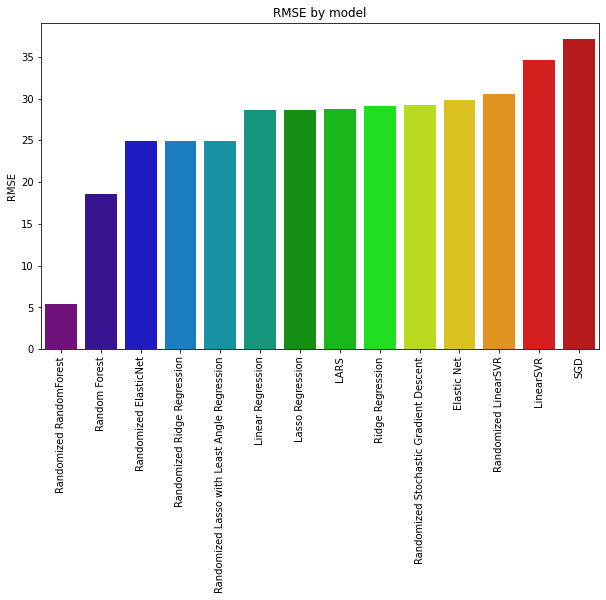

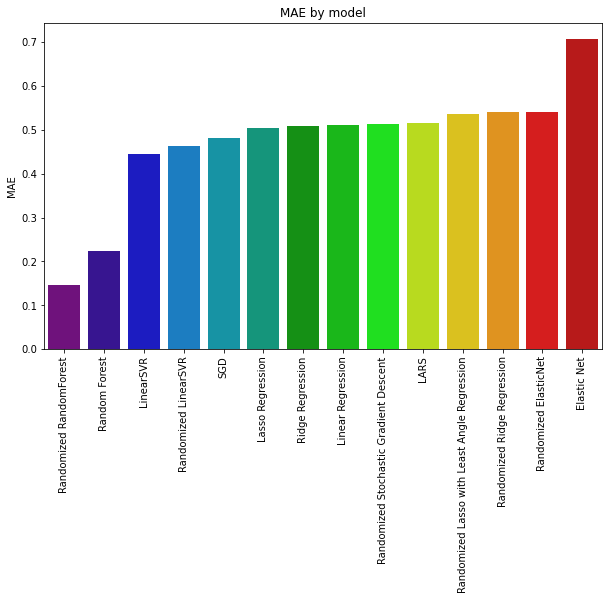

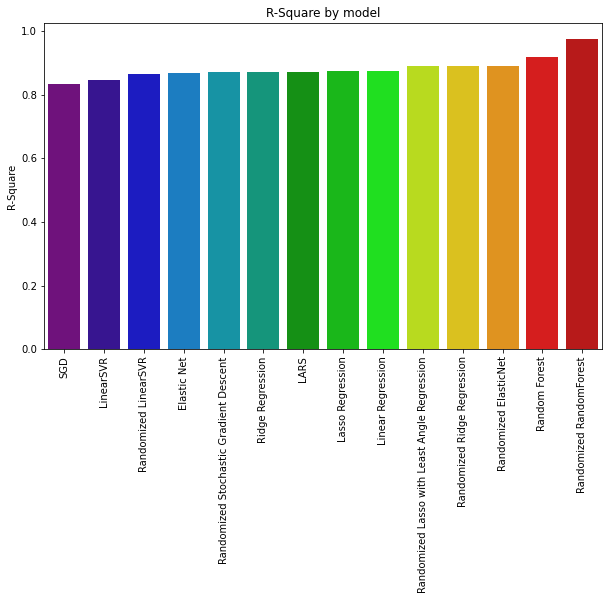

In [94]:
for i in ['RMSE', 'MAE', 'R-Square']:
    plt.figure(figsize=(10, 6))
    g = sns.barplot(data=results_with_random.sort_values(
        i), x=results_with_random.sort_values(i).index.to_list(), y=i, palette='nipy_spectral')
    plt.xticks(rotation=90)
    plt.title('{} by model'.format(i))
    plt.show()

## 5.8 - Takeaways

The Random Forest seems to lead the pack in terms of the regression metrics we are using (R-Square, RMSE, MAE). Even unoptimized and with relatively stock hyperparameters, it still beat out the rest of the models, optimized or otherwise.

A major caveat is, if we save the model as a `.pkl` file in the next segment for future retrieval, we find the random forest model to be rather large and unwieldy, with the randomized search version taking up well over `1 GB` of space. It also took almost an hour to train, compared with the other models like the `ElasticNet()` model. The ElasticNet model took just a few minutes to train, yet performed relatively well, with R-Square improving by `2.56%` and an RMSE reduction of `16.7%`. Hence, the `RandomForestRegressor` might not be the best choice. After all, this is still a comparatively simple regression exercise, and does not warrant the sheer computing resources required by the random forest.

Another interesting point to note is that `LinearSVR()` performed below expectations, despite the randomized search optimization and significant time required to train the model. It could be due to the fact that it relies on an algorithm that is ill suited to a large number of features, and is sensitive to scaling of the data.

Earlier versions of this notebook misspecified the `eta0` parameter for `SGDRegressor` which resulted in massive fluctuations in model output. It was tuned downwards to improve numerical stability. This underscores the importance of understanding the workings of the models and how hyperparameters affect them.

----

# 6 - Saving models

We will now `dump` our models into `.pkl` files for easy access.

First, let's clear all previous instances of `.pkl` files in the current directory

In [95]:
import os
import glob

files = glob.glob('./*.pkl', recursive=True)

for f in files:
    try:
        os.remove(f)
    except OSError as e:
        print("Error: %s : %s" % (f, e.strerror))

Next, we make a dict of all models for easy model output

In [96]:
model_dict = {'linreg': linreg,
              'lasso_regr': lasso_regr,
              'ridge': ridge,
              'rf_regr': rf_regr,
              'elastic_regr': elastic_regr,
              'sgd': sgd,
              'LARS': LARS,
              'linear_svr_regr': linear_svr_regr,
              'best_random_svr': best_random_svr,
              'best_random_rf': best_random_rf,
              'best_random_lassolars': best_random_lassolars,
              'best_random_sgd': best_random_sgd,
              'best_random_elasticnet': best_random_elasticnet}
model_dict

{'linreg': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'lasso_regr': Lasso(alpha=0.00099, copy_X=True, fit_intercept=True, max_iter=50000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False),
 'ridge': Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=True, random_state=None, solver='auto', tol=0.001),
 'rf_regr': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False),
 'elastic_regr': ElasticNet

In [97]:
from sklearn.externals import joblib
for k, v in model_dict.items():
    model_name = '{}_model.pkl'.format(k)
    joblib.dump(v, model_name)

We can now load any of our previous models and use them for prediction.

In [98]:
model_name = 'best_random_sgd'
model = joblib.load('{}_model.pkl'.format(model_name))
model

SGDRegressor(alpha=0.0007444444444444445, average=False, early_stopping=False,
             epsilon=0.8388888888888889, eta0=0.0075, fit_intercept=True,
             l1_ratio=0.15, learning_rate='adaptive',
             loss='epsilon_insensitive', max_iter=1000, n_iter_no_change=5,
             penalty='l2', power_t=0.39444444444444443, random_state=None,
             shuffle=True, tol=0.009222222222222222, validation_fraction=0.1,
             verbose=0, warm_start=False)

The root mean square error of the model is 29.257471810779048
The mean absolute error of the model is 0.5143974917277867
The R square of the model is 0.8698246232035671


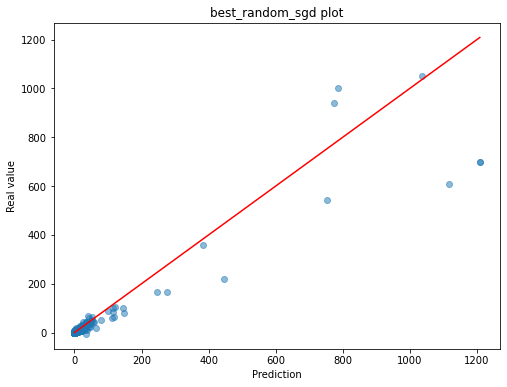

In [99]:
Y_pred_loaded_model = model.predict(X_test)
regression_metrics(Y_test, Y_pred_loaded_model, model_name)
regression_plot(Y_test, Y_pred_loaded_model, '{} plot'.format(model_name))